<a href="https://colab.research.google.com/github/vtu19744/ENCRYPTIX/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
data=pd.read_csv('/content/advertising (1).csv')
print("Data Shape:",data.shape)
print(data.head())


Data Shape: (200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
data.fillna(method='ffill',inplace=True)
data=pd.get_dummies(data,drop_first=True)

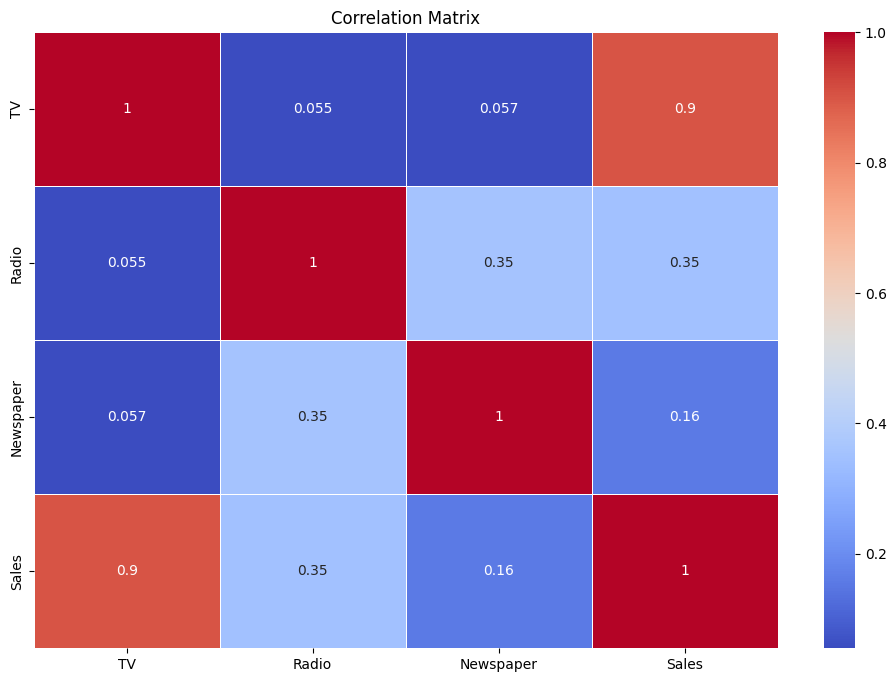

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
x=data.drop('Sales',axis=1)
y=data['Sales']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE:0.9025249999999971
MSE:1.392004358333325
RMSE:0.9549529188820681


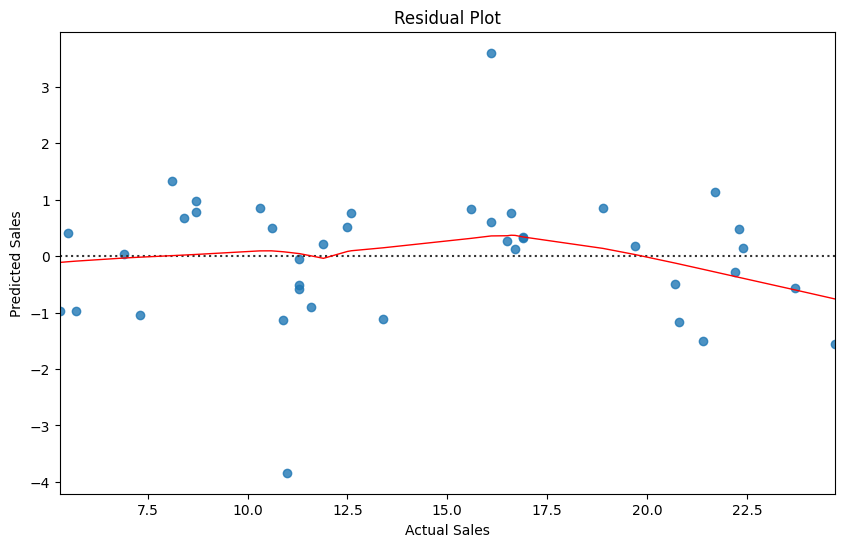

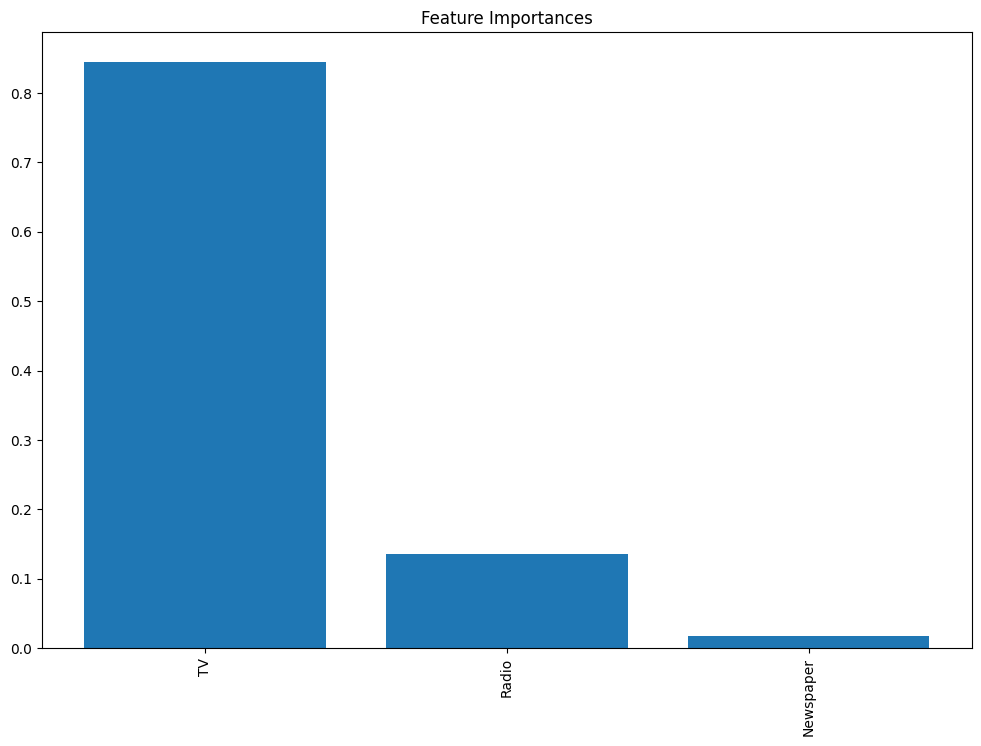

['scaler.pkl']

In [11]:
rf=RandomForestRegressor(random_state=42)
param_grid={
    'n_estimators':[100,200,300],
    'max_features':['auto','sqrt'],
    'max_depth':[10,20,None]
}
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=r2_score(y_test,y_pred)
print(f'MAE:{mae}')
print(f'MSE:{mse}')
print(f'RMSE:{rmse}')

plt.figure(figsize=(10,6))
sns.residplot(x=y_test,y=y_pred,lowess=True,line_kws={'color':'red','lw':1})
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Residual Plot')
plt.show()
importances=best_model.feature_importances_
indices=np.argsort(importances)[::-1]
features=x.columns
plt.figure(figsize=(12,8))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]),importances[indices],align="center")
plt.xticks(range(x.shape[1]),features[indices],rotation=90)
plt.show()
new_data=pd.DataFrame({
    'Advertising Expenditure':[5000],
    'Target Audience Segmentation':[3],
    'Advertising Platform_Online':[1],
    'Advertising Platform_TV':[0]
})
joblib.dump(best_model,'sales_prediction_model.pkl')
joblib.dump(scaler,'scaler.pkl')